## Codice usando i dati presenti nel  [paper(pag 18, paragrafo 4.2)](https://drive.google.com/file/d/1YBFS7FW81_pyuryAb5ISiofgLkT7Gp-P/view?usp=sharing).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append('../lib/')
from utils import *
import numpy as np 

mu0 = 0.0
var0 = 1

x = np.array([-2.296, -0.216, -0.082, 0.231, 1.127, 1.164, 1.189, 1.236, 1.272, 1.373])

In [2]:
Nodes = [f'a{i}' for i in range(-7, 2)] + [f'b{i}' for i in range(-7, 2)]

C_G = nx.complete_graph(Nodes)
W_G = nx.Graph()

In [1]:
A = []
B = []
AB = [] 

link_A, link_B, link_AB = 0, 0, 0

for edge in C_G.edges:
    node1, node2 = edge
    if node1[0] == node2[0] == 'a':
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -2**(pi+pj)*fAA(var0)
        
        link_A += 1
        A.append(w)
        W_G.add_edge(node1, node2, bij=w)
        
    elif node1[0] == node2[0] == 'b':
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -np.sum(2**(pi+pj)*fBB(x, mu0, var0))
        
        link_B += 1
        B.append(w)
        W_G.add_edge(node1, node2, bij=w)
        
    else:
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -np.sum(2**(pi+pj)*fAB(x, mu0, var0))
        
        link_AB += 1
        AB.append(w)
        W_G.add_edge(node1, node2, bij=w)

NameError: name 'C_G' is not defined

In [4]:
W_G.number_of_edges(), link_A, link_B, link_AB

(153, 36, 36, 81)

In [165]:
'''A = np.array(A) / link_A
B = np.array(B) / link_B
AB = np.array(AB) / link_AB'''

'A = np.array(A) / link_A\nB = np.array(B) / link_B\nAB = np.array(AB) / link_AB'

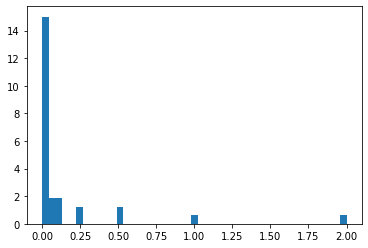

In [5]:
plt.hist(A, bins='auto', density=True);

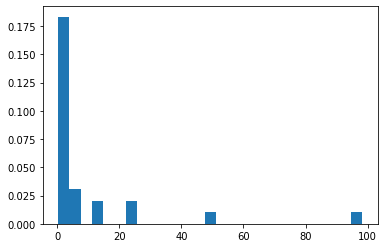

In [167]:
plt.hist(B, bins='auto');

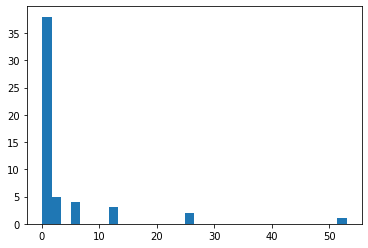

In [168]:
plt.hist(AB, bins='auto');

In [6]:
np.sum(-(x-mu0)**2/(var0)**2)

-14.447911999999999

In [7]:
node_weights = np.zeros(W_G.number_of_nodes())
for i, node in enumerate(C_G.nodes):
    if node[0] == 'a':
        p = int(node[1:])
        w = -np.sum(2**p * fA(x, mu0, var0) + (2**(2*p - 1) - 2**p*mu0)*fAA(var0) - 2**p*var0*fAB(x, mu0, var0))
        
        node_weights[i] = w
    else:
        p = int(node[1:])
        w = -np.sum(2**p * fB(x, mu0, var0) + (2**(2*p - 1) - 2**p*var0)*fBB(x, mu0, var0) - 2**p*var0*fAB(x, mu0, var0))
        
        node_weights[i] = w

nx.set_node_attributes(W_G, {a:{'ai':b} for a, b in zip(C_G.nodes, node_weights)})

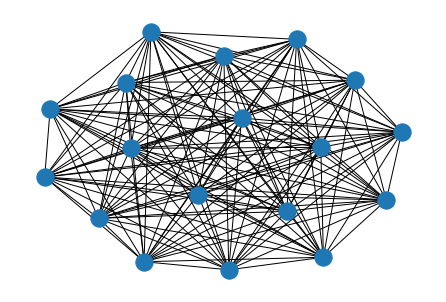

In [8]:
nx.draw(W_G)

In [20]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

bqm = dimod.from_networkx_graph(W_G, vartype='BINARY', edge_attribute_name='weight', node_attribute_name='weight')

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=100, chain_strength=-5) #

In [176]:
sampleset.variables

Variables(['a-1', 'a-2', 'a-3', 'a-4', 'a-5', 'a-6', 'a-7', 'a0', 'a1', 'b-1', 'b-2', 'b-3', 'b-4', 'b-5', 'b-6', 'b-7', 'b0', 'b1'])

In [21]:
theta = np.zeros(len(sampleset.record))
phi = np.zeros(len(sampleset.record))

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    mu = 0
    var = 0
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i][1:])
        if sampleset.variables[i][0] == 'a':
            mu = mu + 2**(p) * sol
        else:
            var = var + 2**(p) * sol
            
    theta[k] = mu
    phi[k] = var

(array([ 6., 11., 10.,  9., 14., 18., 12., 20.]),
 array([0.2265625 , 0.69726562, 1.16796875, 1.63867188, 2.109375  ,
        2.58007812, 3.05078125, 3.52148438, 3.9921875 ]),
 <BarContainer object of 8 artists>)

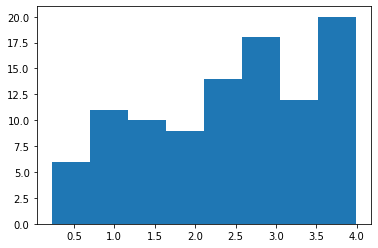

In [22]:
plt.hist(theta, bins='auto')

(array([24.,  0., 14., 16., 12., 14.,  0., 20.]),
 array([0.6953125 , 1.10742188, 1.51953125, 1.93164062, 2.34375   ,
        2.75585938, 3.16796875, 3.58007812, 3.9921875 ]),
 <BarContainer object of 8 artists>)

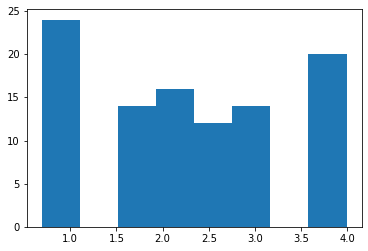

In [23]:
plt.hist(phi, bins='auto')

In [24]:
dwave.inspector.show(sampleset)

'http://127.0.0.1:18000/?problemId=1152e570-5b9c-4b13-8ab7-84cfe4bf3435'